# FitzHugh-Nagumo Model
Code solves FitzHugh-Naugmo for given parameters and given inital conditon for the activating component $u$ and inhibiting conponment $v$.

Currently with inital conditions defined in such a way that one spiral wave is created.

In [10]:
from projectlib2 import *

## Parameters

In [11]:
# System-paramters
epsilon = 0.01 #time scale seperation ~ refractory period
a = 3          #excitation duration
b = 0.2        #from excitation threshhold b
D = 1          #Diffusitivity

# Grid
N = 200
L = 300

# Time
t_end = 400

## Functions FitzHugh-Nagumo

In [12]:
def fitzhugh_nagumo_du(u, v): #excitation (membrane voltage)
    return (a*u*(u-b)*(1-u) - v + D*convolve(u, laplace(N, L), mode="reflect"))

def fitzhugh_nagumo_dv(u, v): #refractory
    return epsilon*(u-v)

## Conditions for excitation $u$ and refractory $v$

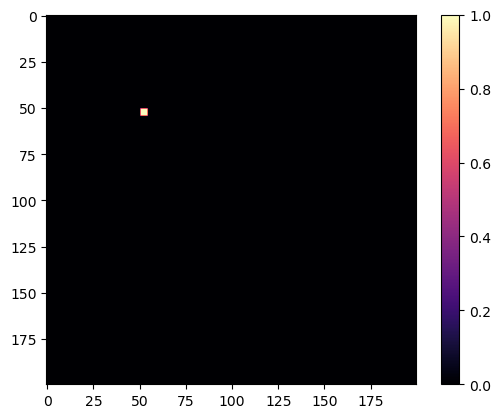

In [13]:
# for concentric wave
x = np.linspace(-L / 2, L / 2, N, endpoint=False)
X, Y = np.meshgrid(x, x)
u = np.zeros((N,N))
v = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if (i>50) and (i<55):
            if (j>50) and (j<55):
                u[i][j] = 1
 

plt.imshow(u, vmin=0, vmax=1, cmap="magma")
plt.colorbar()
plt.show()

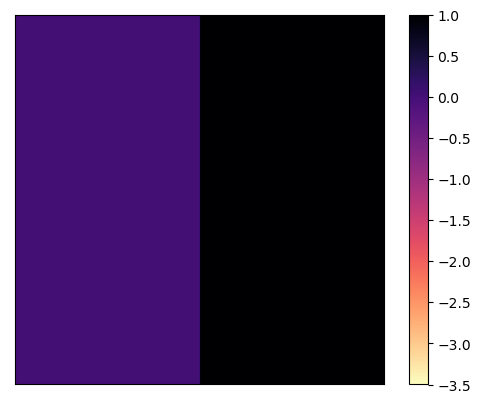

In [14]:
# for spiral wave
x = np.linspace(-L / 2, L / 2, N, endpoint=False)
X, Y = np.meshgrid(x, x)
u = np.zeros((N,N))
v = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if (i<N/5):
            if (j<N/2):
                u[i][j] = 1
        if (j>=N/2):
            v[i][j] = 1
 
fig, ax=plt.subplots()
ax.set_yticks([])
ax.set_xticks([])


plt.imshow(v, vmin=-3.5, vmax=1.0, cmap="magma_r")
#plt.imshow(u, vmin=-0.2, vmax=1.0, cmap="magma")

plt.colorbar()
plt.show()

### Solve System

In [15]:
output_steps = 50
dt = 1e-2
U, V = solve_system(fitzhugh_nagumo_du, fitzhugh_nagumo_dv, u, v, t_end, dt, output_steps)

In [16]:
np.save("FHN_u", U)
np.save("FHN_v", V)

### Animate Solution

In [ ]:
def plot_state(i):
    return plt.imshow(U[i].reshape(N, N), vmin=-0.2, vmax=1.01, cmap="magma")

In [ ]:
frame_setting = output_steps
interval_setting=10000/frame_setting
ani1 = animation.FuncAnimation(plt.gcf(), plot_state,frames=frame_setting, interval=interval_setting, blit=False,repeat_delay=100)
HTML(ani1.to_html5_video())